In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/big-mart-sales/Train-Set.csv')
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: xlabel='OutletSales', ylabel='Density'>

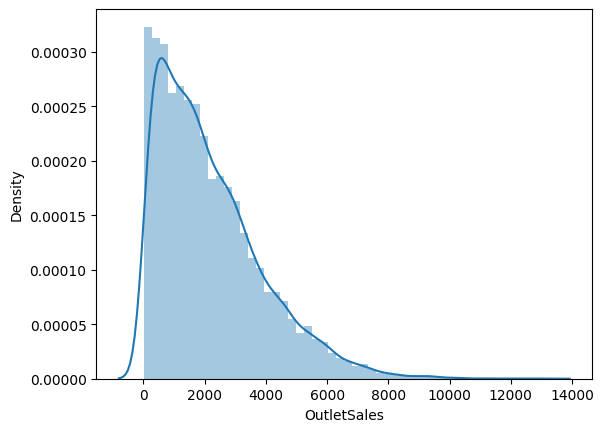

In [5]:
sns.distplot(df['OutletSales'])

In [6]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [8]:
df['Weight'] = df['Weight'].fillna(12.857645184135976)
df.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [10]:
df.OutletSize.mode()

0    Medium
Name: OutletSize, dtype: object

In [11]:
df['OutletSize'] = df['OutletSize'].fillna('Medium')
df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             8523 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         8523 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df = df.drop(['ProductID','OutletID'],axis=1)
df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
df['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [19]:
df['FatContent'] = df['FatContent'].replace({'Low Fat':0,'low fat':0,'LF':0,'Regular':1,'reg':1})
df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,0,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df.ProductType.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [22]:
df = df.join(pd.get_dummies(df.ProductType).astype(int))
df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,...,0,0,0,1,0,0,0,0,0,0


In [23]:
df = df.drop(['ProductType'],axis=1)
df.head()

,Weight,FatContent,ProductVisibility,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weight                 8523 non-null   float64
 1   FatContent             8523 non-null   int64  
 2   ProductVisibility      8523 non-null   float64
 3   MRP                    8523 non-null   float64
 4   EstablishmentYear      8523 non-null   int64  
 5   OutletSize             8523 non-null   object 
 6   LocationType           8523 non-null   object 
 7   OutletType             8523 non-null   object 
 8   OutletSales            8523 non-null   float64
 9   Baking Goods           8523 non-null   int64  
 10  Breads                 8523 non-null   int64  
 11  Breakfast              8523 non-null   int64  
 12  Canned                 8523 non-null   int64  
 13  Dairy                  8523 non-null   int64  
 14  Frozen Foods           8523 non-null   int64  
 15  Frui

In [25]:
df.OutletSize.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [26]:
df['OutletSize'] = df['OutletSize'].map({'Medium':1,'Small':0,'High':2})
df.head()



,Weight,FatContent,ProductVisibility,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,249.8092,1999,1,Tier 1,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,2009,1,Tier 3,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,Tier 1,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1998,1,Tier 3,Grocery Store,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1987,2,Tier 3,Supermarket Type1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
df.LocationType.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [29]:
df.LocationType = df.LocationType.map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
df.head()

,Weight,FatContent,ProductVisibility,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,249.8092,1999,1,0,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,0,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1998,1,2,Grocery Store,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1987,2,2,Supermarket Type1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
df.OutletType.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [31]:
df = df.join(pd.get_dummies(df.OutletType).astype(int))
df.head()

,Weight,FatContent,ProductVisibility,MRP,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,Baking Goods,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1999,1,0,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,Supermarket Type2,443.4228,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,0,Supermarket Type1,2097.2700,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1998,1,2,Grocery Store,732.3800,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,1987,2,2,Supermarket Type1,994.7052,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
df = df.drop(['OutletType'],axis=1)
df.head()

,Weight,FatContent,ProductVisibility,MRP,EstablishmentYear,OutletSize,LocationType,OutletSales,Baking Goods,Breads,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1999,1,0,3735.1380,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,443.4228,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,0,2097.2700,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1998,1,2,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,1987,2,2,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weight                 8523 non-null   float64
 1   FatContent             8523 non-null   int64  
 2   ProductVisibility      8523 non-null   float64
 3   MRP                    8523 non-null   float64
 4   EstablishmentYear      8523 non-null   int64  
 5   OutletSize             8523 non-null   int64  
 6   LocationType           8523 non-null   int64  
 7   OutletSales            8523 non-null   float64
 8   Baking Goods           8523 non-null   int64  
 9   Breads                 8523 non-null   int64  
 10  Breakfast              8523 non-null   int64  
 11  Canned                 8523 non-null   int64  
 12  Dairy                  8523 non-null   int64  
 13  Frozen Foods           8523 non-null   int64  
 14  Fruits and Vegetables  8523 non-null   int64  
 15  Hard

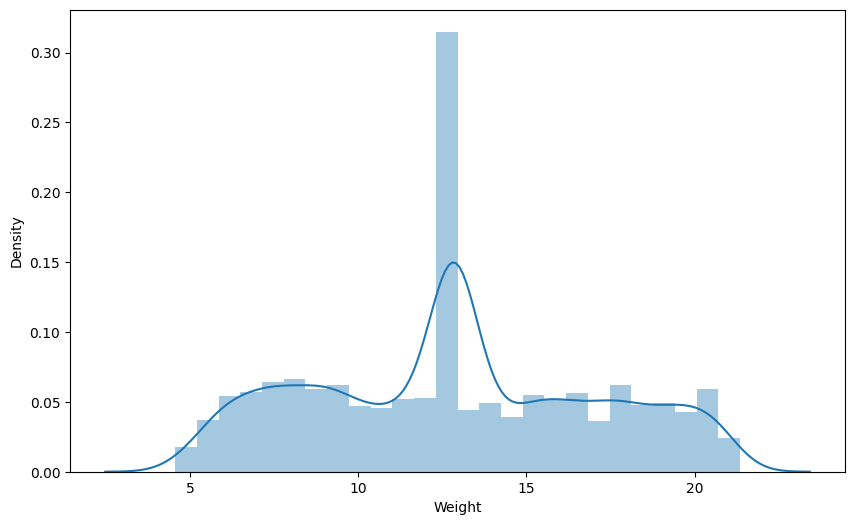

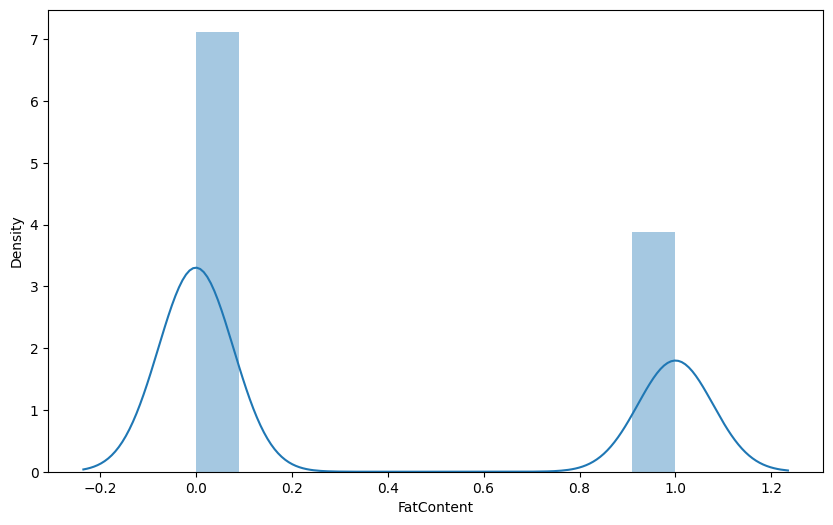

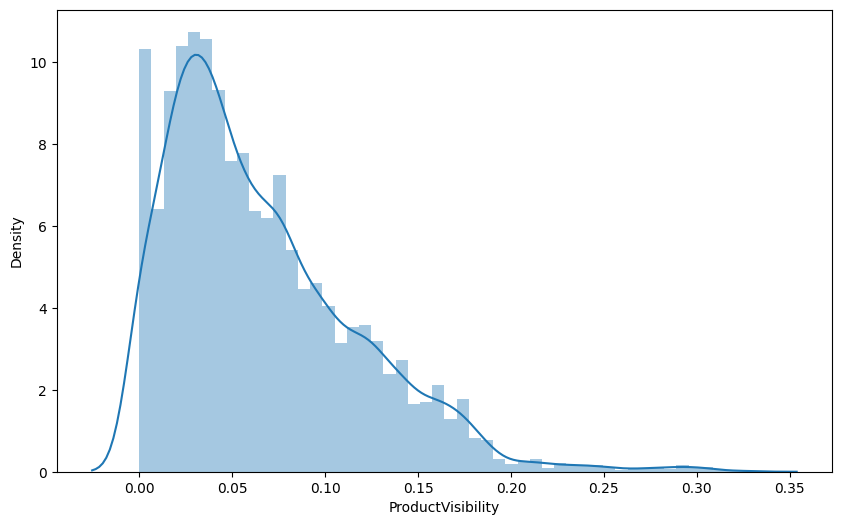

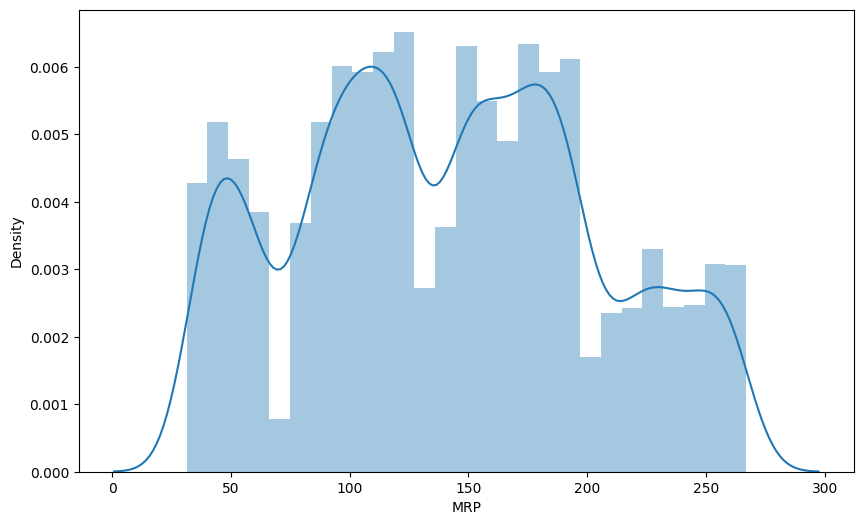

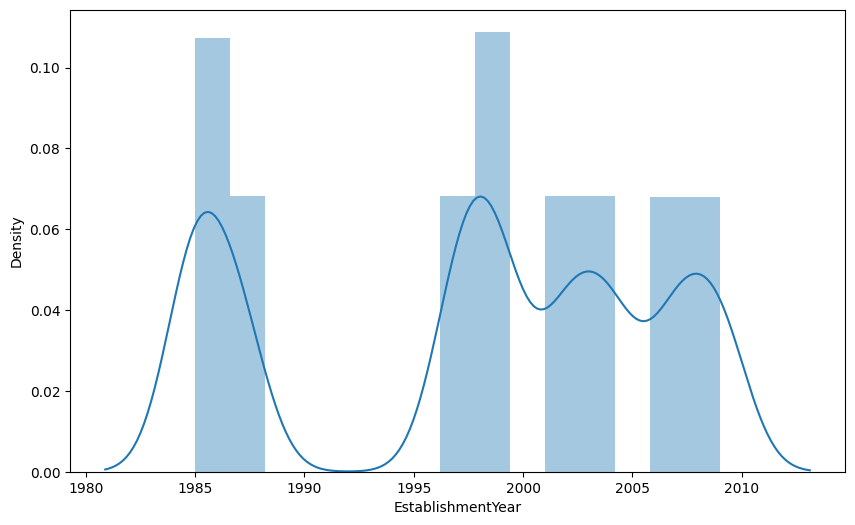

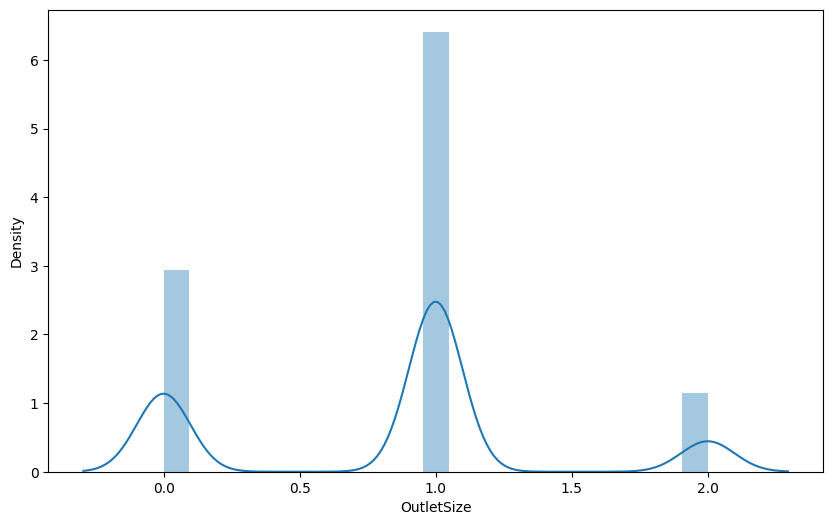

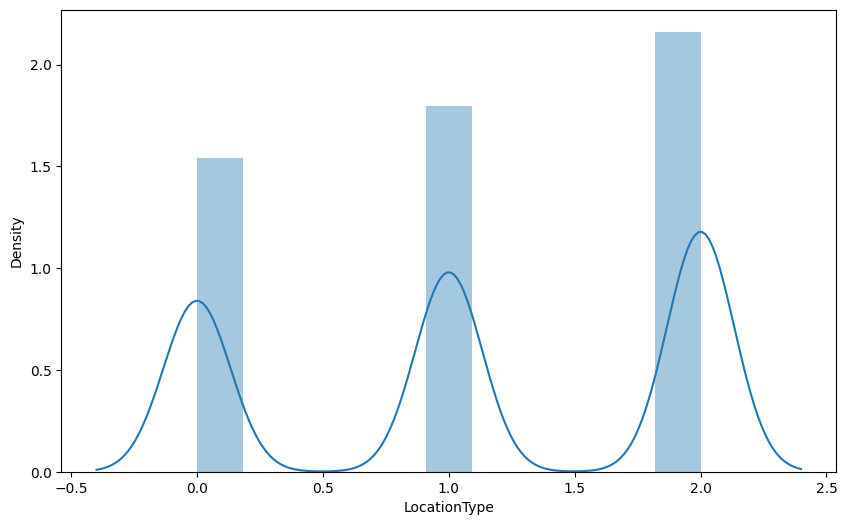

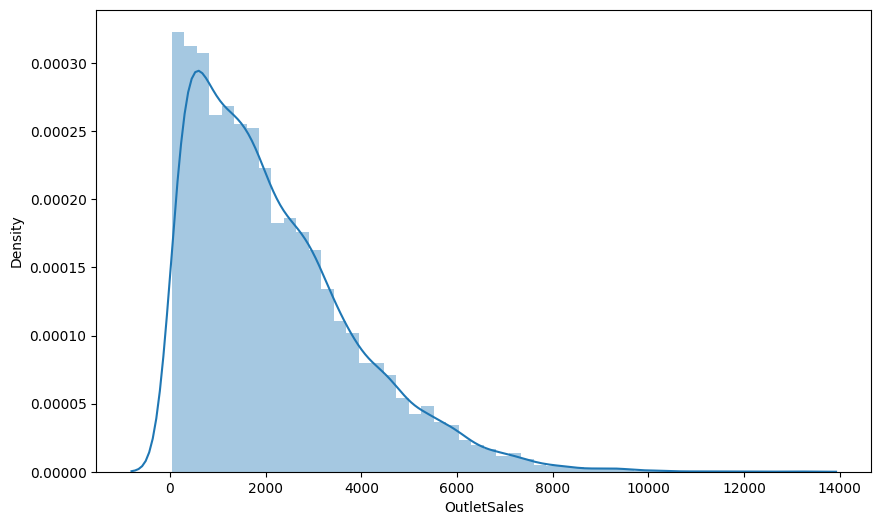

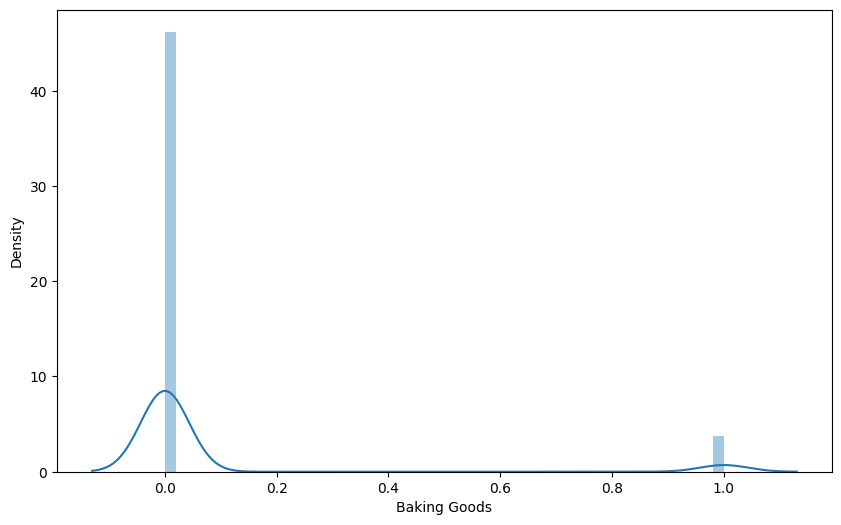

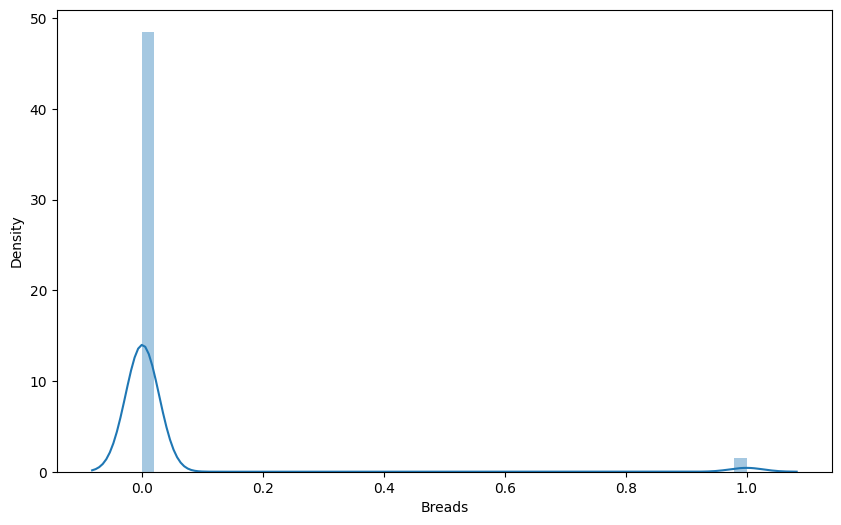

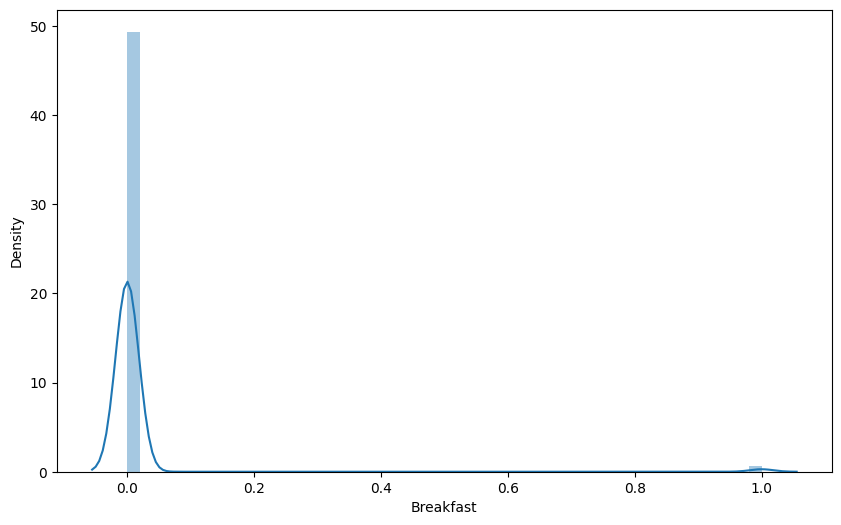

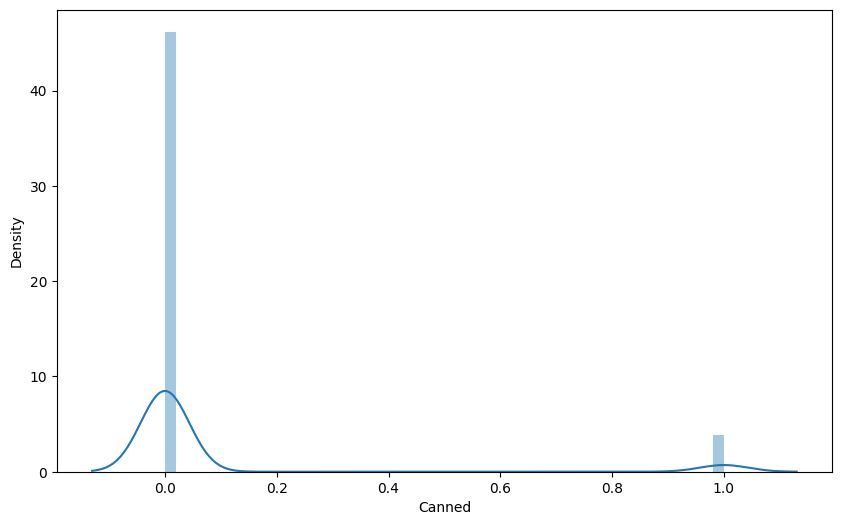

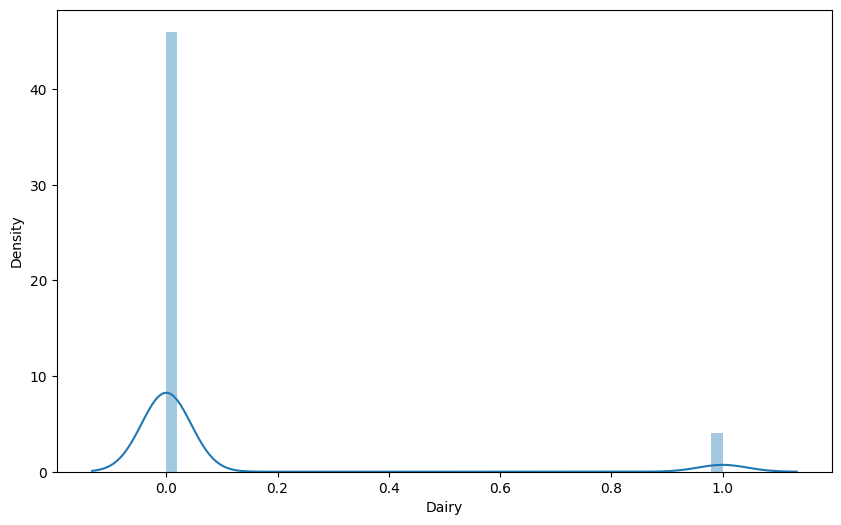

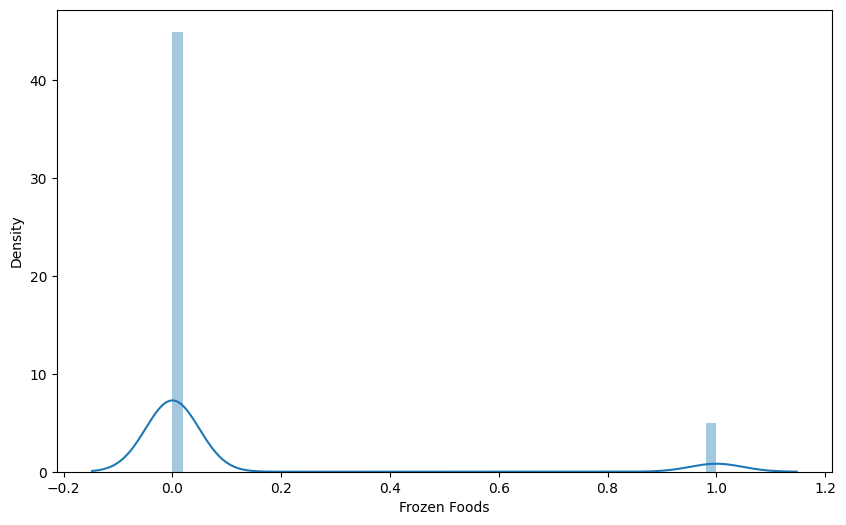

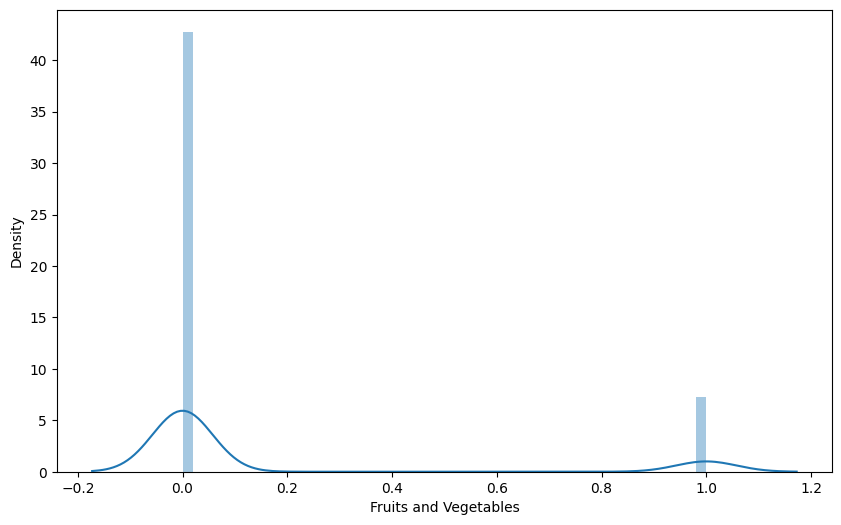

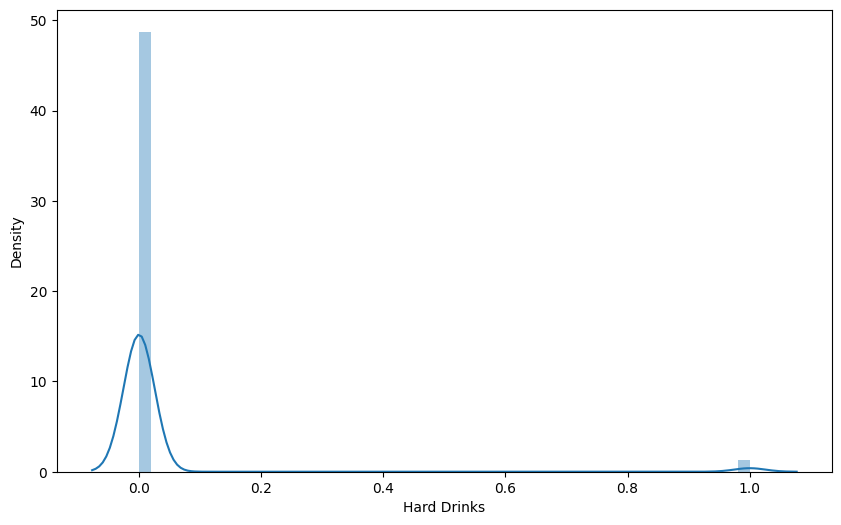

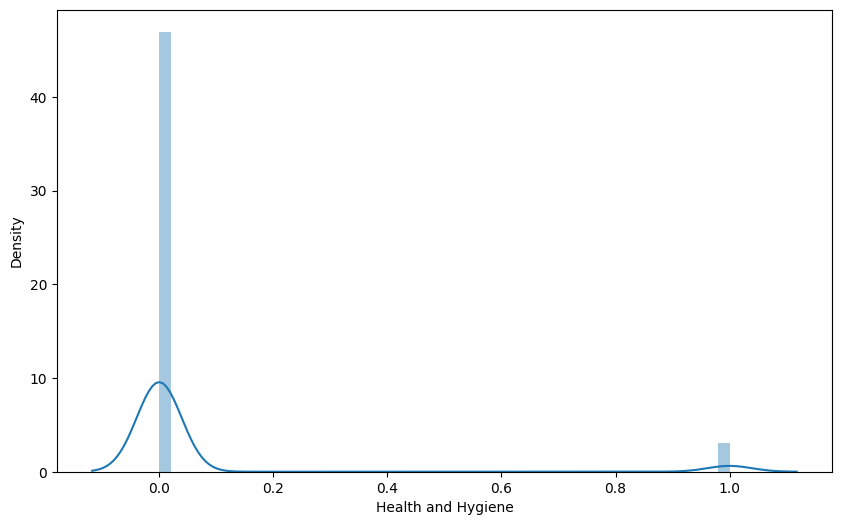

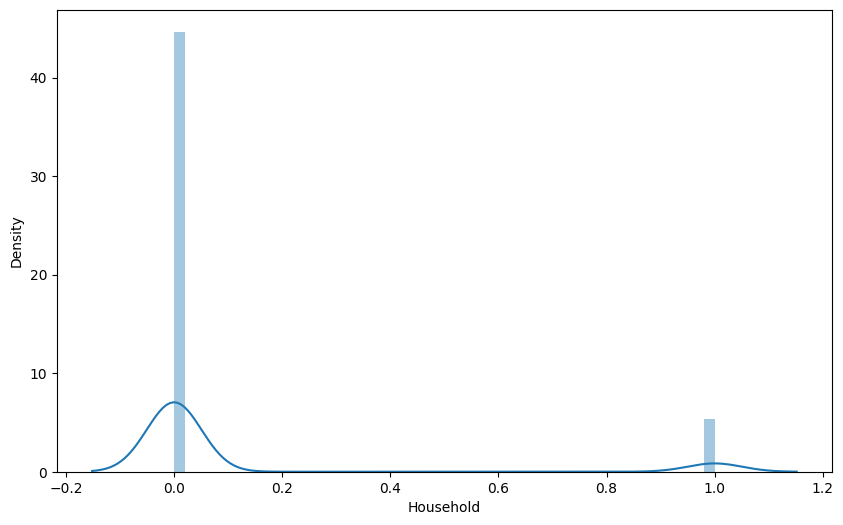

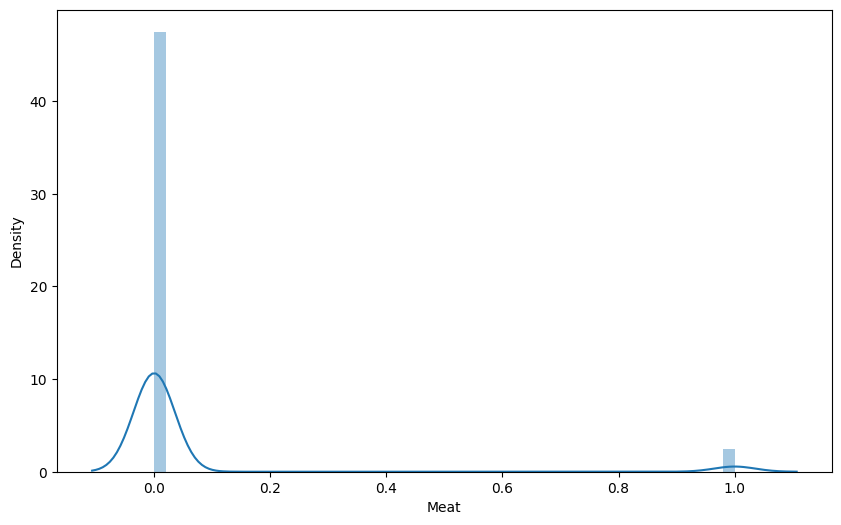

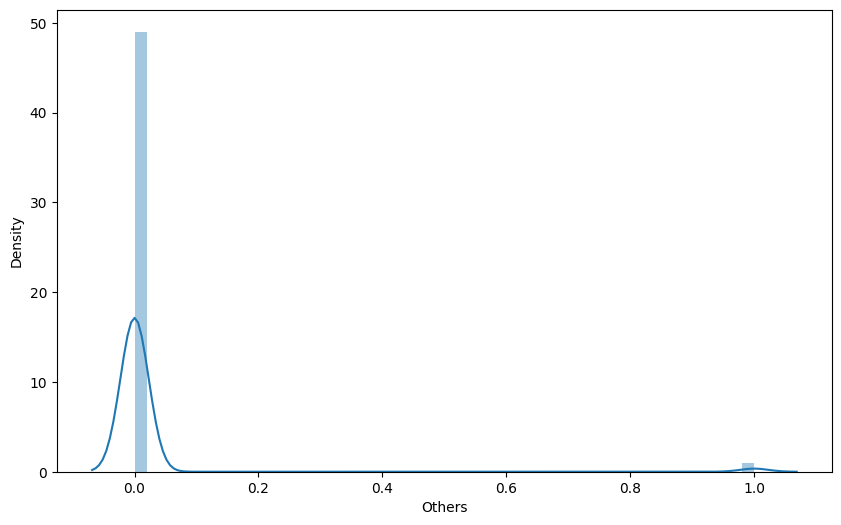

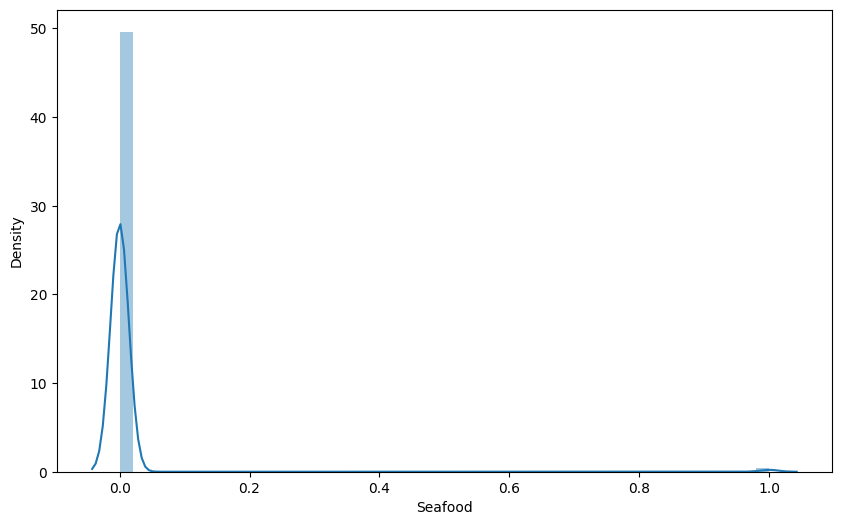

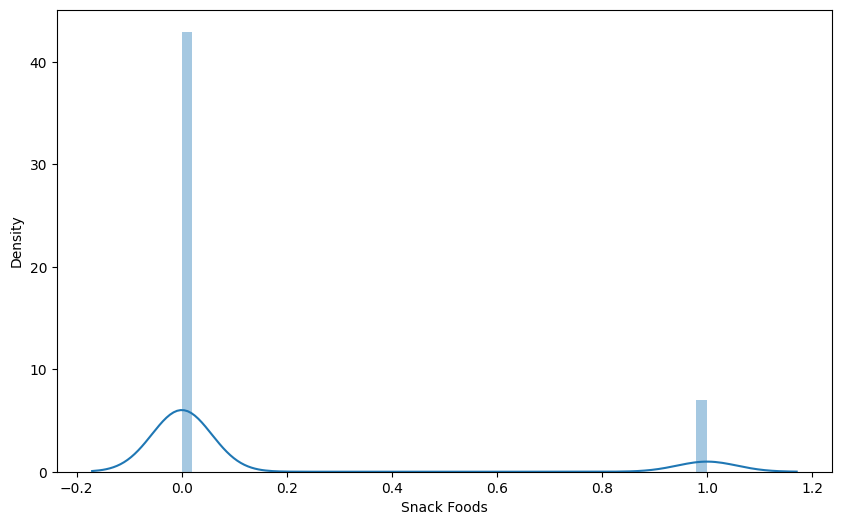

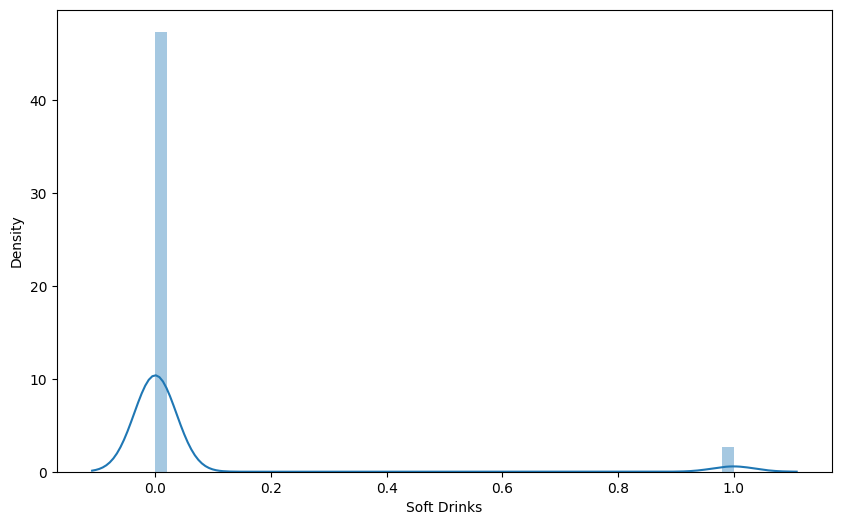

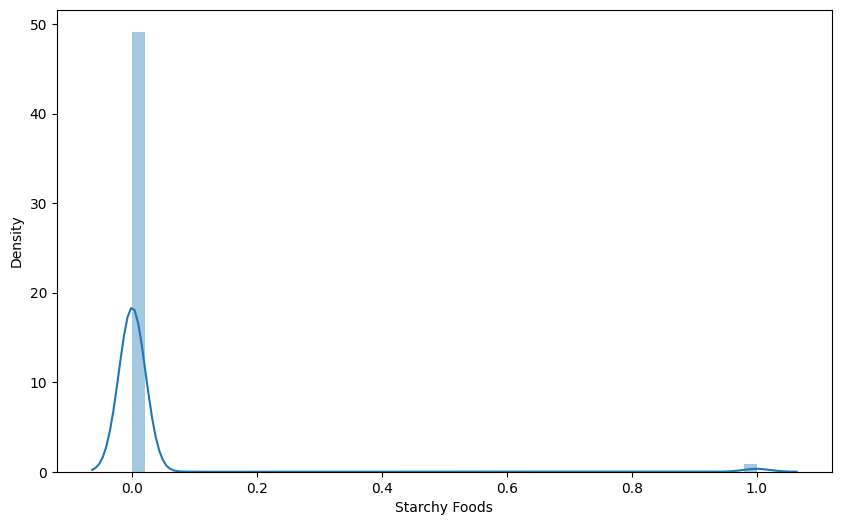

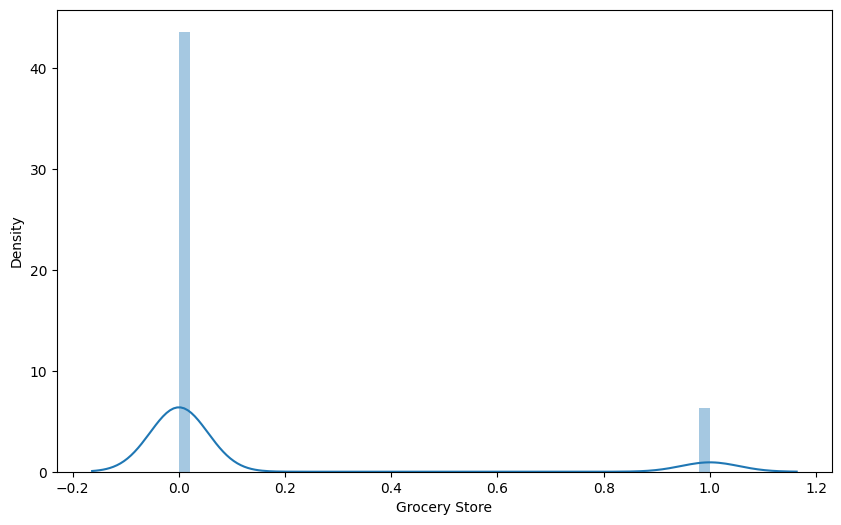

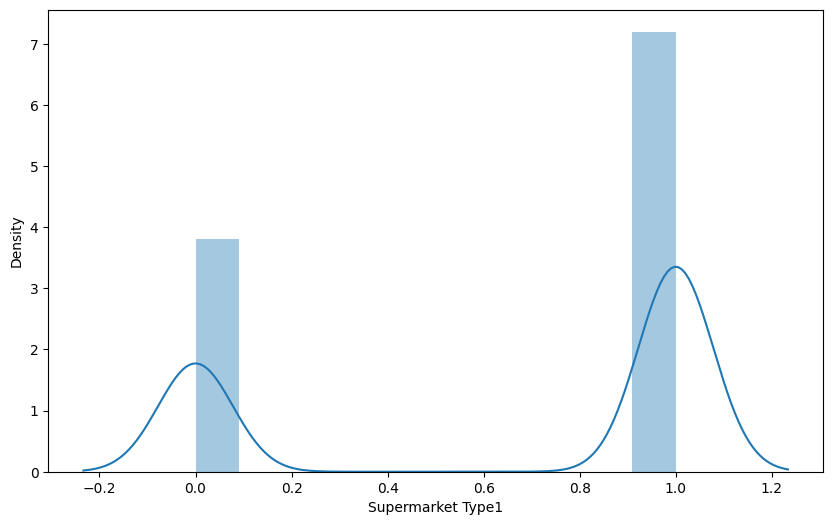

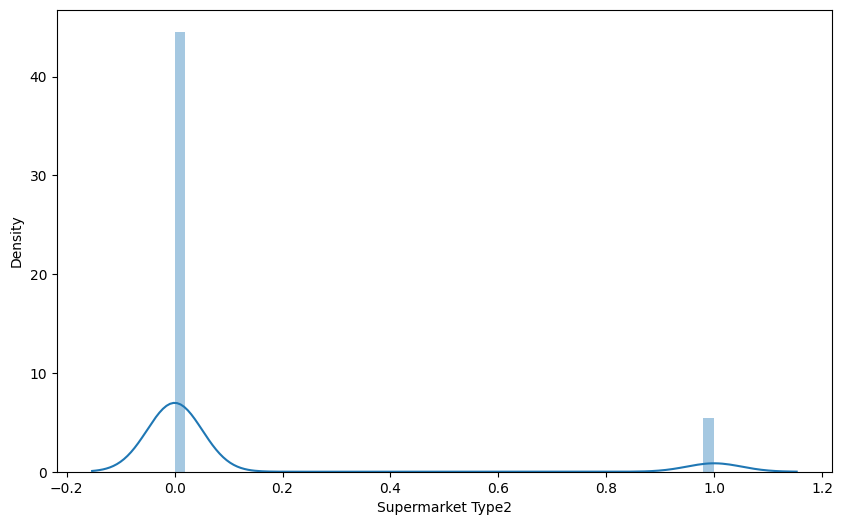

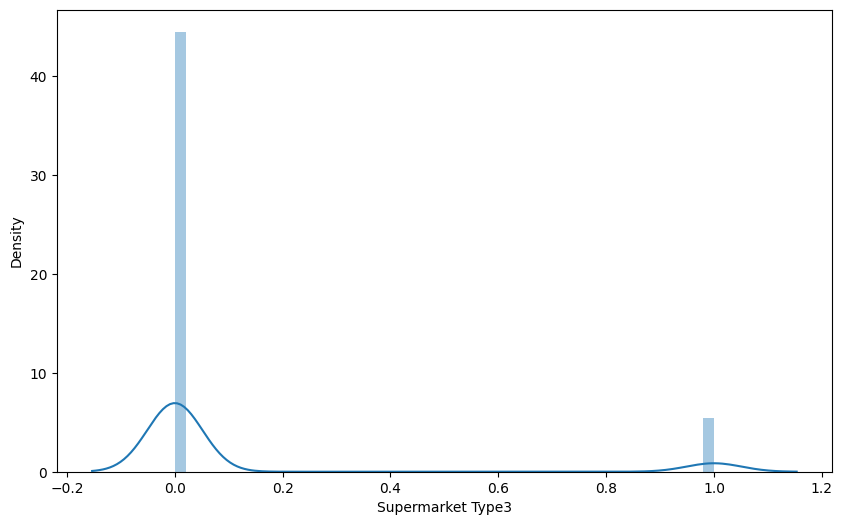

In [34]:

#check dist of all columns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.show()

In [35]:
x= df.drop(['OutletSales'],axis=1)
y = df['OutletSales']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [36]:
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)

Lasso()

In [37]:
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [38]:
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)

AdaBoostRegressor()

In [39]:
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [ ]:
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)

In [41]:
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 27
[LightGBM] [Info] Start training from score 2202.365232


GaussianProcessRegressor()

In [42]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.5781268518982221
RIDGE  0.5781083729253582
LASSO  0.5782203496262903
ELASTICNET 0.5213260771754133
RANDOM FOREST  0.5571264744135317
GB 0.6053291972163095
ADABOOST 0.49904071413160356
XGB 0.5323536561818001
KNN 0.49036241932880975
SVR 0.02719043023503398
CAT 0.5855744805237935
LIGHTGBM 0.5899430205985126
GUASSIAN PROCESS -32215.321914309054


YOU CAN IMPROVE THE MODEL BY DECREASING THE NUMBER OF COLUMNS AND REMOVING OUTLIERS